In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [2]:
bio_df      = pd.read_csv("Olympic_data/Olympic_Athlete_Bio_Clean.csv")
event_df    = pd.read_csv("Olympic_data/Olympic_Athlete_Event_Results_Clean.csv")
result_df   = pd.read_csv("Olympic_data/Olympic_Results.csv")
game_df     = pd.read_csv("Olympic_data/Olympics_Games.csv")
country_df  = pd.read_csv("Olympic_data/Olympics_Country.csv")
medal_df    = pd.read_csv("Olympic_data/Olympic_Games_Medal_Tally.csv")

In [3]:
event_df = event_df.loc[event_df["sport"] == "Swimming"]
del event_df["Unnamed: 0"]


In [4]:
event_df

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport
33,1908 Summer Olympics,5,ANZ,Swimming,"400 metres Freestyle, Men",4494,Frank Beaurepaire,45155,2,Silver,False
34,1908 Summer Olympics,5,ANZ,Swimming,"1,500 metres Freestyle, Men",4509,Frank Beaurepaire,45155,3,Bronze,False
35,1912 Summer Olympics,6,ANZ,Swimming,"100 metres Freestyle, Men",4554,Cecil Healy,45217,2,Silver,False
36,1912 Summer Olympics,6,ANZ,Swimming,"400 metres Freestyle, Men",4573,Harold Hardwick,45212,3,Bronze,False
37,1912 Summer Olympics,6,ANZ,Swimming,"1,500 metres Freestyle, Men",4585,Harold Hardwick,45212,3,Bronze,False
...,...,...,...,...,...,...,...,...,...,...,...
44567,2020 Summer Olympics,61,USA,Swimming,"4 × 100 metres Medley Relay, Women",19000326,Abbey Weitzeil,132152,2,Silver,True
44568,2020 Summer Olympics,61,USA,Swimming,"4 × 100 metres Medley Relay, Women",19000326,Rhyan White,2506218,2,Silver,True
44569,2020 Summer Olympics,61,USA,Swimming,"4 × 100 metres Medley Relay, Women",19000326,Lilly King,132158,2,Silver,True
44570,2020 Summer Olympics,61,USA,Swimming,"4 × 100 metres Medley Relay, Women",19000326,Claire Curzan,147272,2,Silver,True


In [5]:
# Convert medals to numeric values for easier aggregation
medal_to_numeric = {'Gold': 3, 'Silver': 2, 'Bronze': 1, 'None': 0}
event_df['medal_numeric'] = event_df['medal'].map(medal_to_numeric)

In [6]:
# Extract the year from the 'edition' column
event_df['edition_year'] = event_df['edition'].str.extract(r'(\d{4})').astype(int)

# Filter data for the years 2000 to 2020
df_filtered = event_df[(event_df['edition_year'] >= 2000) & (event_df['edition_year'] <= 2020)]


In [7]:
# Calculate total medals by country and year
total_medals = df_filtered.groupby(['edition_year', 'country_noc']).size().reset_index(name='total_medals')

# Pivot the table to get a matrix of country performances over years
country_performance = total_medals.pivot_table(index='country_noc', columns='edition_year', values='total_medals', fill_value=0)

# Calculate the improvement from 2000 to 2020
def calculate_improvement(row):
    if 2000 in row and 2020 in row:
        return row[2020] - row[2000]
    return None


In [8]:
# Calculate improvement
country_performance['improvement'] = country_performance.apply(calculate_improvement, axis=1)

# Filter out countries without data for both 2000 and 2020
improvement_df = country_performance.dropna(subset=['improvement']).reset_index()

# Identify the top 10 countries in total medals for 2020
top_10_countries_2020 = total_medals[total_medals['edition_year'] == 2020]
top_10_countries_2020 = top_10_countries_2020.groupby('country_noc').sum().reset_index()
top_10_countries_2020 = top_10_countries_2020.sort_values(by='total_medals', ascending=False).head(10)
# Display the top 10 countries based on total medals in 2020
print("Top 10 countries in total medals for 2020:")
print(top_10_countries_2020)

Top 10 countries in total medals for 2020:
   country_noc  edition_year  total_medals
20         USA          2020            59
0          AUS          2020            53
7          GBR          2020            20
2          CAN          2020            15
3          CHN          2020            14
11         ITA          2020            13
14         ROC          2020            10
12         JPN          2020             3
8          GER          2020             2
9          HKG          2020             2


In [9]:


# Sort countries by the amount of improvement
most_improved_countries = improvement_df.sort_values(by='improvement', ascending=False)

# Display the most improved countries
print("Most improved countries from 2000 to 2020:")
print(most_improved_countries.head(10))


Most improved countries from 2000 to 2020:
edition_year country_noc  2000  2004  2008  2012  2016  2020  improvement
14                   GBR   0.0   2.0   3.0   3.0  13.0  20.0         20.0
6                    CAN   1.0   0.0   1.0   2.0  15.0  15.0         14.0
7                    CHN   0.0   6.0  14.0  15.0   6.0  14.0         14.0
26                   ROC   0.0   0.0   0.0   0.0   0.0  10.0         10.0
1                    AUS  46.0  31.0  54.0  32.0  32.0  53.0          7.0
18                   ITA   6.0   7.0   2.0   0.0   3.0  13.0          7.0
33                   SUI   0.0   0.0   0.0   0.0   0.0   2.0          2.0
16                   HKG   0.0   0.0   0.0   0.0   0.0   2.0          2.0
12                   FIN   0.0   0.0   0.0   0.0   0.0   1.0          1.0
17                   HUN   1.0   2.0   3.0   2.0   7.0   2.0          1.0


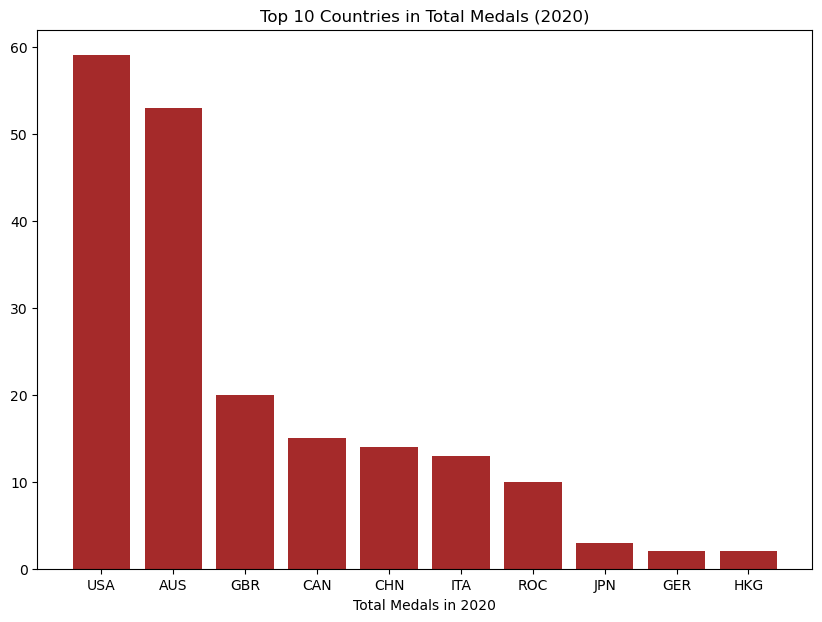

In [10]:
# Plot the top 10 most improved countries
top_10_improved = most_improved_countries.head(10)

plt.figure(figsize=(10, 7))

# Plot for Top 10 countries in 2020
plt.bar(top_10_countries_2020['country_noc'], top_10_countries_2020['total_medals'], color='brown')
plt.xlabel('Total Medals in 2020')
plt.title('Top 10 Countries in Total Medals (2020)')
plt.show()



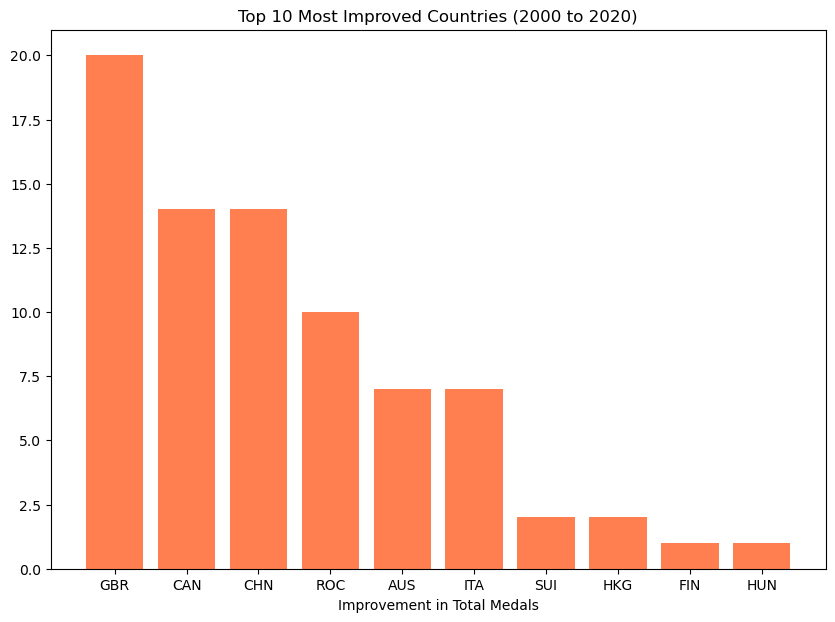

In [11]:
# Plot for Most Improved Countries
plt.figure(figsize=(10, 7))
plt.bar(top_10_improved['country_noc'], top_10_improved['improvement'], color='Coral')
plt.xlabel('Improvement in Total Medals')
plt.title('Top 10 Most Improved Countries (2000 to 2020)')
plt.show()

In [13]:
event_df['year'] = event_df['edition'].str.split(' ').str[0].astype(int)

# Filter the data for years between 2000 and 2020
df_filtered = event_df[(event_df['year'] >= 2000) & (event_df['year'] <= 2020)]

# Display the first few rows of the filtered DataFrame
df_filtered.head()

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,medal_numeric,edition_year,year
291,2012 Summer Olympics,54,BLR,Swimming,"50 metres Freestyle, Women",322320,Aliaksandra Herasimenia,116762,2,Silver,False,2,2012,2012
292,2012 Summer Olympics,54,BLR,Swimming,"100 metres Freestyle, Women",322262,Aliaksandra Herasimenia,116762,2,Silver,False,2,2012,2012
307,2016 Summer Olympics,59,BLR,Swimming,"50 metres Freestyle, Women",357170,Aliaksandra Herasimenia,116762,3,Bronze,False,1,2016,2016
339,2000 Summer Olympics,25,CRC,Swimming,"200 metres Freestyle, Women",8580,Claudia Poll,46200,3,Bronze,False,1,2000,2000
340,2000 Summer Olympics,25,CRC,Swimming,"400 metres Freestyle, Women",8592,Claudia Poll,46200,3,Bronze,False,1,2000,2000


In [14]:
# Group by country, medal type, and year, then count the number of medals
medal_counts = df_filtered.groupby(['country_noc', 'medal', 'year']).size().reset_index(name='medal_count')

# Display the aggregated data
medal_counts.head()

,country_noc,medal,year,medal_count
0,ARG,Bronze,2004,1
1,AUS,Bronze,2000,4
2,AUS,Bronze,2004,3
3,AUS,Bronze,2008,22
4,AUS,Bronze,2012,8


In [15]:
# Pivot table to get medals by year
pivot_table = medal_counts.pivot_table(index=['country_noc', 'medal'], columns='year', values='medal_count', fill_value=0)

# Display the pivot table
pivot_table.head()

year                2000  2004  2008  2012  2016  2020
country_noc medal                                     
ARG         Bronze   0.0   1.0   0.0   0.0   0.0   0.0
AUS         Bronze   4.0   3.0  22.0   8.0  11.0  30.0
            Gold    15.0  17.0  19.0   7.0   7.0  20.0
            Silver  27.0  11.0  13.0  17.0  14.0   3.0
AUT         Bronze   0.0   0.0   1.0   0.0   0.0   0.0

In [16]:
# Ensure the years 2000 and 2020 are in the pivot table columns
pivot_table = pivot_table[[2000, 2020]].copy()

# Calculate the change in medals from 2000 to 2020
pivot_table['change'] = pivot_table[2020] - pivot_table[2000]

# Display the changes
pivot_table.head()

year                2000  2020  change
country_noc medal                     
ARG         Bronze   0.0   0.0     0.0
AUS         Bronze   4.0  30.0    26.0
            Gold    15.0  20.0     5.0
            Silver  27.0   3.0   -24.0
AUT         Bronze   0.0   0.0     0.0

In [17]:
# Find the most improved country per medal type
most_improved = pivot_table.loc[pivot_table.groupby('medal')['change'].idxmax()]

# Display the most improved countries
most_improved

,year,2000,2020,change
country_noc,medal,,,
AUS,Bronze,4.0,30.0,26.0
GBR,Gold,0.0,12.0,12.0
CAN,Silver,0.0,7.0,7.0


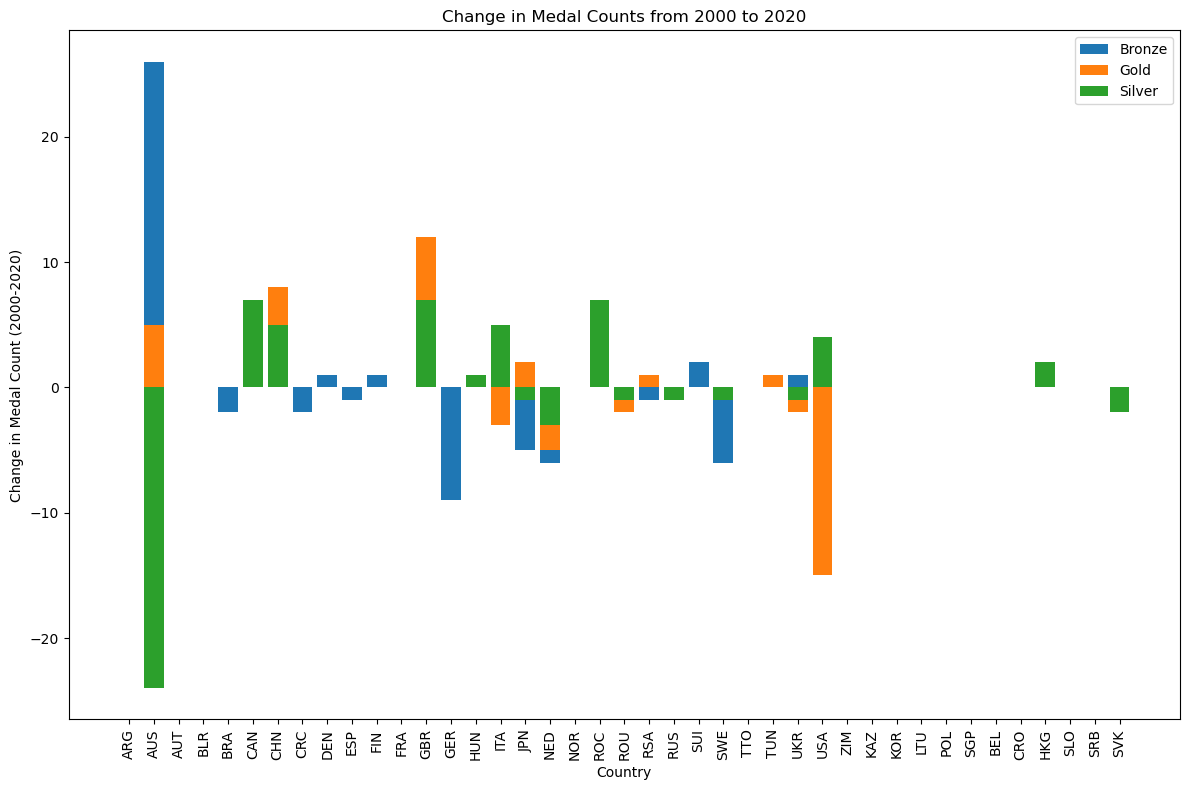

In [18]:
# Plot changes in medal counts using plt.bar
plt.figure(figsize=(12, 8))

# Plot each medal type
for medal in pivot_table.index.get_level_values('medal').unique():
    data = pivot_table.xs(medal, level='medal')
    plt.bar(data.index, data['change'], label=medal)

# Set labels and title
plt.xlabel('Country')
plt.ylabel('Change in Medal Count (2000-2020)')
plt.title('Change in Medal Counts from 2000 to 2020')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust layout to make room for rotated x-axis labels
plt.tight_layout()

# Show the plot
plt.show()